**Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?**

**Answer:**

K-Nearest Neighbors (KNN) is a non-parametric, lazy learning algorithm used for both classification and regression tasks.

*   **Classification:** In classification, KNN assigns a new data point to the class that is most common among its 'k' nearest neighbors in the training dataset. The 'k' value is a user-defined integer. The distance between data points is typically calculated using metrics like Euclidean distance.
*   **Regression:** In regression, KNN predicts the value for a new data point by taking the average (or weighted average) of the values of its 'k' nearest neighbors in the training dataset.

KNN is a "lazy" algorithm because it does not build a model during the training phase. Instead, it memorizes the training data and performs computations only when a prediction is needed for a new data point.

**Question 2: What is the Curse of Dimensionality and how does it affect KNN performance?**

**Answer:**

The Curse of Dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (spaces with many features or variables) that do not occur in low-dimensional settings.

In the context of KNN, the Curse of Dimensionality can significantly affect its performance in several ways:

*   **Increased Sparsity:** As the number of dimensions increases, the data points become increasingly sparse. This means that the distance between any two data points becomes less meaningful, and the concept of "nearest neighbors" becomes ill-defined.
*   **Computational Cost:** Calculating distances between data points in high-dimensional spaces becomes computationally expensive, making KNN training and prediction slower.
*   **Difficulty in Finding True Neighbors:** In high dimensions, all data points tend to be roughly equidistant from each other. This makes it difficult to identify true nearest neighbors, leading to inaccurate predictions.
*   **Increased Variance:** With increased sparsity and difficulty in finding true neighbors, the model becomes more sensitive to noise in the data, leading to higher variance and overfitting.

**Question 3: What is Principal Component Analysis (PCA)? How is it different from feature selection?**

**Answer:**

Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features in a dataset while retaining as much of the original variance (information) as possible. It does this by transforming the original features into a new set of uncorrelated features called principal components. The first principal component captures the most variance, the second captures the second most, and so on.

The key difference between PCA and feature selection is:

*   **PCA (Feature Extraction):** PCA creates new features (principal components) which are linear combinations of the original features. It transforms the data into a lower-dimensional space.
*   **Feature Selection:** Feature selection methods choose a subset of the original features and discard the rest. It retains the original features but reduces their number.

In essence, PCA compresses the information into fewer dimensions, while feature selection removes less important dimensions.

**Question 4: What are eigenvalues and eigenvectors in PCA, and why are they important?**

**Answer:**

In PCA, eigenvalues and eigenvectors are fundamental concepts derived from the covariance matrix of the dataset.

*   **Eigenvectors:** Eigenvectors are the directions or principal components along which the data has the most variance. They represent the new axes of the transformed data space. There are as many eigenvectors as there are original features.
*   **Eigenvalues:** Eigenvalues represent the magnitude of the variance along the corresponding eigenvector. A larger eigenvalue indicates that more variance in the data is captured by that principal component.

**Importance in PCA:**

*   **Determining Principal Components:** Eigenvectors define the directions of the principal components. The eigenvector with the largest eigenvalue is the first principal component, the eigenvector with the second largest eigenvalue is the second principal component, and so on.
*   **Measuring Variance:** Eigenvalues quantify the amount of variance explained by each principal component. This allows us to rank the principal components in terms of their importance and decide how many components to retain to capture a desired percentage of the total variance.
*   **Dimensionality Reduction:** By selecting the eigenvectors with the largest eigenvalues, we can project the data onto a lower-dimensional subspace spanned by these principal components, effectively reducing the dimensionality of the dataset while preserving most of the important information.

**Question 5: How do KNN and PCA complement each other when applied in a single pipeline?**

**Answer:**

KNN and PCA can complement each other effectively in a single pipeline, particularly when dealing with high-dimensional data. Here's how they can work together:

1.  **PCA for Dimensionality Reduction:** PCA is applied first to reduce the dimensionality of the dataset. This addresses the Curse of Dimensionality issue that can negatively impact KNN performance in high-dimensional spaces. By transforming the data into a lower-dimensional space with fewer, uncorrelated features (principal components), PCA makes the distance calculations in KNN more meaningful and computationally efficient.
2.  **KNN for Classification/Regression:** After the data has been transformed by PCA, the KNN algorithm is applied to the reduced-dimensional data for classification or regression.

**Benefits of using PCA before KNN:**

*   **Improved Performance:** Reducing dimensionality with PCA can lead to significant improvements in KNN's accuracy and efficiency, especially on datasets with many features. It helps mitigate the effects of the Curse of Dimensionality.
*   **Reduced Computational Cost:** Working with fewer features in the lower-dimensional space reduces the computational cost of calculating distances in KNN.
*   **Noise Reduction:** PCA can help in reducing noise in the data by focusing on the components that explain the most variance, effectively filtering out less important and potentially noisy dimensions.
*   **Addressing Multicollinearity:** PCA creates uncorrelated principal components, which can be beneficial if the original features in the dataset are highly correlated.

In summary, PCA acts as a preprocessing step that prepares the data for KNN by reducing dimensionality and potentially improving the quality of the data for the KNN algorithm.

In [1]:
# Question 6: Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN without feature scaling
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

print(f"Accuracy of KNN without scaling: {accuracy_no_scaling:.4f}")

# Train KNN with feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy of KNN with scaling: {accuracy_scaled:.4f}")

# Compare accuracies
print("\nComparison of Accuracies:")
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")

Accuracy of KNN without scaling: 0.7407
Accuracy of KNN with scaling: 0.9630

Comparison of Accuracies:
Accuracy without scaling: 0.7407
Accuracy with scaling: 0.9630


In [2]:
# Question 7: Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# It's good practice to scale data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a PCA model
pca = PCA()
pca.fit(X_scaled)

# Print the explained variance ratio of each principal component
print("Explained Variance Ratio of each Principal Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Optional: Print the cumulative explained variance ratio
import numpy as np
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_explained_variance):
    print(f"Up to Principal Component {i+1}: {ratio:.4f}")

Explained Variance Ratio of each Principal Component:
Principal Component 1: 0.3620
Principal Component 2: 0.1921
Principal Component 3: 0.1112
Principal Component 4: 0.0707
Principal Component 5: 0.0656
Principal Component 6: 0.0494
Principal Component 7: 0.0424
Principal Component 8: 0.0268
Principal Component 9: 0.0222
Principal Component 10: 0.0193
Principal Component 11: 0.0174
Principal Component 12: 0.0130
Principal Component 13: 0.0080

Cumulative Explained Variance Ratio:
Up to Principal Component 1: 0.3620
Up to Principal Component 2: 0.5541
Up to Principal Component 3: 0.6653
Up to Principal Component 4: 0.7360
Up to Principal Component 5: 0.8016
Up to Principal Component 6: 0.8510
Up to Principal Component 7: 0.8934
Up to Principal Component 8: 0.9202
Up to Principal Component 9: 0.9424
Up to Principal Component 10: 0.9617
Up to Principal Component 11: 0.9791
Up to Principal Component 12: 0.9920
Up to Principal Component 13: 1.0000


In [3]:
# Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA, retaining top 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN on the PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy of KNN on PCA-transformed data (top 2 components): {accuracy_pca:.4f}")

# Retrain and evaluate KNN on the original scaled data for comparison (from Question 6)
knn_scaled_original = KNeighborsClassifier(n_neighbors=5)
knn_scaled_original.fit(X_train_scaled, y_train)
y_pred_scaled_original = knn_scaled_original.predict(X_test_scaled)
accuracy_scaled_original = accuracy_score(y_test, y_pred_scaled_original)

print(f"Accuracy of KNN on original scaled data: {accuracy_scaled_original:.4f}")

# Compare accuracies
print("\nComparison of Accuracies:")
print(f"Accuracy on PCA-transformed data: {accuracy_pca:.4f}")
print(f"Accuracy on original scaled data: {accuracy_scaled_original:.4f}")

Accuracy of KNN on PCA-transformed data (top 2 components): 0.9815
Accuracy of KNN on original scaled data: 0.9630

Comparison of Accuracies:
Accuracy on PCA-transformed data: 0.9815
Accuracy on original scaled data: 0.9630


In [4]:
# Question 9: Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

print(f"Accuracy of KNN with Euclidean distance (on scaled data): {accuracy_euclidean:.4f}")

# Train KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy of KNN with Manhattan distance (on scaled data): {accuracy_manhattan:.4f}")

# Compare accuracies
print("\nComparison of Accuracies:")
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.4f}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.4f}")

Accuracy of KNN with Euclidean distance (on scaled data): 0.9630
Accuracy of KNN with Manhattan distance (on scaled data): 0.9630

Comparison of Accuracies:
Accuracy with Euclidean distance: 0.9630
Accuracy with Manhattan distance: 0.9630


**Question 10: You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer.**
Due to the large number of features and a small number of samples, traditional models overfit.
Explain how you would:
*   Use PCA to reduce dimensionality
*   Decide how many components to keep
*   Use KNN for classification post-dimensionality reduction
*   Evaluate the model
*   Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data

**Answer:**

Here's a breakdown of the process and the justification for using a PCA + KNN pipeline for high-dimensional gene expression data with limited samples:

**1. Use PCA to reduce dimensionality:**

In high-dimensional datasets like gene expression data, many features can be correlated or contain redundant information. PCA addresses this by transforming the data into a new set of uncorrelated principal components. These components are linear combinations of the original features and are ordered by the amount of variance they explain in the data. By keeping only the top components, we can capture most of the important information while significantly reducing the number of features.

**2. Decide how many components to keep:**

Determining the optimal number of components to retain is crucial. Several methods can be used:

*   **Explained Variance Plot:** Plot the cumulative explained variance ratio against the number of principal components. Choose the number of components where the curve plateaus, indicating that adding more components does not significantly increase the explained variance. A common threshold is to retain components that explain 95% or more of the total variance.
*   **Scree Plot:** This plot shows the eigenvalues (variance explained by each component) in descending order. Look for an "elbow" in the plot, where the eigenvalues drop significantly. The components before the elbow are usually considered important.
*   **Cross-Validation:** Use cross-validation with the downstream classifier (KNN in this case) to evaluate the performance for different numbers of principal components and select the number that yields the best performance.

**3. Use KNN for classification post-dimensionality reduction:**

Once the data is transformed into a lower-dimensional space using the selected principal components, you can apply the KNN classifier. KNN works well in lower-dimensional spaces as the concept of "nearest neighbors" becomes more meaningful and distance calculations are more reliable.

**4. Evaluate the model:**

Evaluate the performance of the KNN classifier on the test set using appropriate metrics for classification, such as:

*   **Accuracy:** The proportion of correctly classified samples.
*   **Precision:** The proportion of true positive predictions among all positive predictions.
*   **Recall (Sensitivity):** The proportion of true positive predictions among all actual positives.
*   **F1-score:** The harmonic mean of precision and recall, providing a balanced measure.
*   **Confusion Matrix:** A table summarizing the performance of the classification model.
*   **ROC Curve and AUC:** Useful for evaluating the model's ability to distinguish between classes.

**5. Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data:**

Here's how you can justify this PCA + KNN pipeline to stakeholders:

*   **Addresses the Curse of Dimensionality:** Gene expression data is inherently high-dimensional. PCA effectively reduces this dimensionality, making the problem tractable and improving the reliability of distance-based algorithms like KNN.
*   **Mitigates Overfitting:** By reducing the number of features, PCA helps to prevent overfitting, which is a common problem when the number of features is much larger than the number of samples. This leads to a more generalizable model.
*   **Captures Important Information:** PCA retains the components that explain the most variance in the data, ensuring that the most important biological signals are preserved for classification.
*   **Improved Computational Efficiency:** Working with a lower-dimensional dataset significantly reduces the computational cost and training time of the KNN classifier.
*   **Interpretable (to some extent):** While the principal components are linear combinations of original genes, you can often investigate the loadings of the original genes on the most important components to gain some insights into which genes are driving the classification.
*   **Proven Techniques:** Both PCA and KNN are well-established and widely used techniques in machine learning and bioinformatics, providing a degree of confidence in their application.
*   **Handles Non-linear Relationships (indirectly):** While PCA is a linear technique, the subsequent application of KNN can still capture some non-linear relationships in the data.

In summary, the PCA + KNN pipeline is a practical and effective approach for classifying high-dimensional gene expression data with limited samples. It leverages the strengths of both techniques to address the challenges posed by such datasets, leading to improved model performance, reduced overfitting, and computational efficiency, making it a robust solution for real-world biomedical applications.

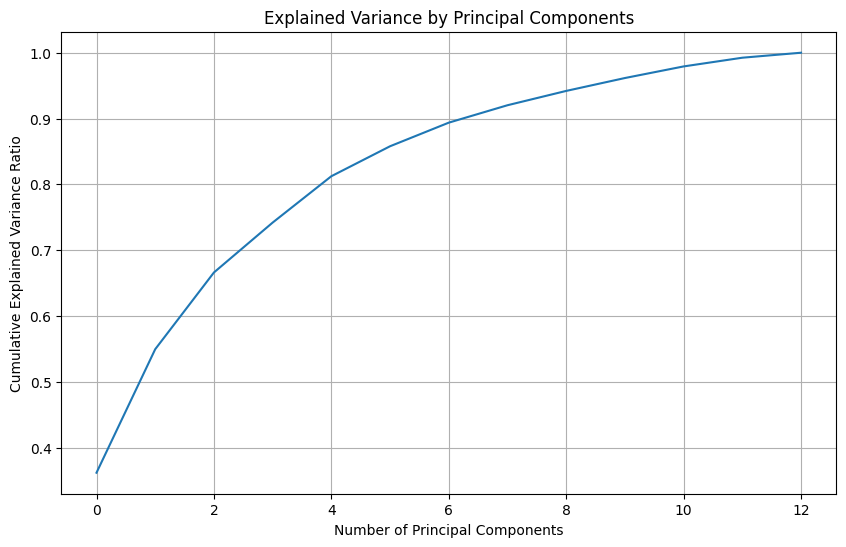


Number of components to keep to retain >= 95% variance: 10
Original number of features: 13
Reduced number of features after PCA: 10

Accuracy of KNN on PCA-transformed data: 0.9630

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


Confusion Matrix:
[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


In [6]:
# Example Python code for the PCA + KNN pipeline

from sklearn.datasets import load_wine # Using wine dataset as an example for demonstration
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (Replace with your gene expression data loading)
# For demonstration, we use the Wine dataset as a proxy for high-dimensional data
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (essential for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
# Let's determine the number of components to keep using explained variance
pca = PCA()
pca.fit(X_train_scaled)

# Plot explained variance ratio to decide number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Based on the plot, choose the number of components (e.g., to retain 95% variance)
# You would inspect the plot to make this decision.
# For demonstration, let's assume we choose n_components based on the plot or a threshold.
# For the wine dataset, let's choose components that explain >95% variance
n_components_to_keep = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"\nNumber of components to keep to retain >= 95% variance: {n_components_to_keep}")

# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components_to_keep)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Train KNN on the PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"\nAccuracy of KNN on PCA-transformed data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))